Energy Meter using ML

Loading Dataset

In [1]:
from pandas import read_csv #handling csv

In [2]:
from google.colab import files
uploades = files.upload()

Saving EM.csv to EM.csv


In [3]:
fileName = "EM.csv"
names = ['Voltage' , 'Current' , 'Power' , 'class']
dataset = read_csv(fileName, names=names)

Summarize Data

In [4]:
print(dataset.shape)
print(dataset.head(5))
print(dataset.describe())
print(dataset.groupby('class').size())

(79, 4)
   Voltage  Current  Power   class
0      0.0      0.0      0  Noload
1      0.0      0.0      0  Noload
2      0.0      0.0      0  Noload
3      0.0      0.0      0  Noload
4      0.0      0.0      0  Noload
          Voltage    Current       Power
count   79.000000  79.000000   79.000000
mean   170.013025   5.088608  177.088608
std     96.417954   6.455151  242.708023
min      0.000000   0.000000    0.000000
25%    211.500000   0.150000   52.000000
50%    221.000000   0.200000   58.000000
75%    227.000000   9.950000  319.000000
max    237.000000  19.800000  599.000000
class
Medium    20
Noload    19
Normal    20
Risk      20
dtype: int64


Visualize Data

In [5]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

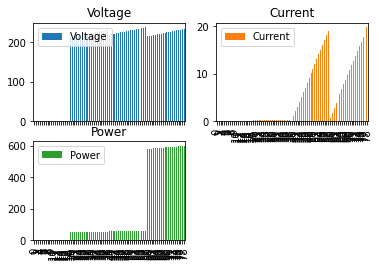

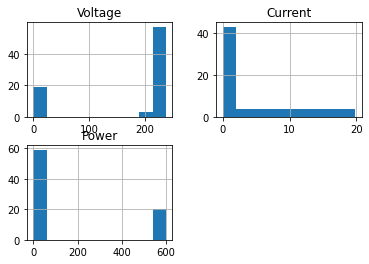

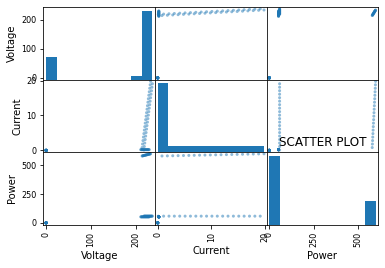

In [6]:
dataset.plot(kind='bar', subplots=True, layout=(2,2))
pyplot.title('BAR PLOT')
pyplot.show()

dataset.hist()
pyplot.title('HISTOGRAM PLOT')
pyplot.show()

scatter_matrix(dataset)
pyplot.title('SCATTER PLOT')
pyplot.show()

Evaluating Various ML Algorithms

In [7]:
#6 ML Algorithm
#!pip install scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split #splitting dataset into train
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [8]:
array = dataset.values
X = array[:,0:3]
Y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1, shuffle=True)

In [9]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 1.000000 (0.000000)
LDA: 0.950000 (0.076376)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


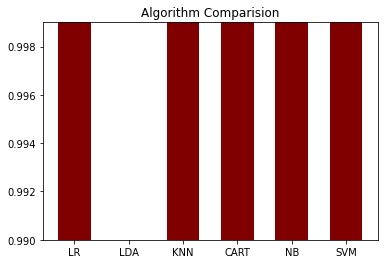

In [10]:
results = []
names = []
res = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=None)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.ylim(.990, .999)
pyplot.bar(names, res, color = 'maroon', width = 0.6)

pyplot.title('Algorithm Comparision')
pyplot.show()